# Dự đoán lương trong với các nghành nghề AI/Data hot 2025

## Import các thư viện

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
import warnings
import math
warnings.filterwarnings('ignore')

## Đọc dữ liệu

In [4]:
# Download latest version
path = kagglehub.dataset_download("bismasajjad/global-ai-job-market-and-salary-trends-2025")

print("Path to dataset files:", path)
df = pd.read_csv(path + '\\ai_job_dataset.csv')

Path to dataset files: C:\Users\Asus\.cache\kagglehub\datasets\bismasajjad\global-ai-job-market-and-salary-trends-2025\versions\1


## Xem qua dữ liệu

In [5]:
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


### **Mô tả các cột trong bộ dữ liệu**

| Tên Cột (Column Name) | Mô tả Tiếng Việt (Vietnamese Description) | Kiểu dữ liệu (Data Type) |
| :--- | :--- | :--- |
| `job_id` | Mã định danh duy nhất cho mỗi tin tuyển dụng. | String |
| `job_title` | Chức danh công việc đã được chuẩn hóa. | String |
| `salary_usd` | Mức lương hàng năm tính bằng USD. | Integer |
| `salary_currency` | Đơn vị tiền tệ của mức lương gốc. | String |
| `salary_local` | Mức lương theo đơn vị tiền tệ địa phương. | Float |
| `experience_level` | Cấp độ kinh nghiệm: EN (Mới vào nghề), MI (Trung cấp), SE (Cao cấp), EX (Chuyên gia/Điều hành). | String |
| `employment_type` | Loại hình công việc: FT (Toàn thời gian), PT (Bán thời gian), CT (Hợp đồng), FL (Làm tự do). | String |
| `job_category` | Danh mục công việc: Kỹ sư Học máy, Nhà khoa học Dữ liệu, Nhà nghiên cứu AI, v.v. | String |
| `company_location` | Quốc gia nơi công ty đặt trụ sở. | String |
| `company_size` | Quy mô công ty: S (Nhỏ <50), M (Vừa 50-250), L (Lớn >250). | String |
| `employee_residence` | Quốc gia nơi nhân viên cư trú. | String |
| `remote_ratio` | Tỷ lệ làm việc từ xa: 0 (Không làm từ xa), 50 (Kết hợp/Hybrid), 100 (Làm từ xa hoàn toàn). | Integer |
| `required_skills` | 5 kỹ năng hàng đầu được yêu cầu (phân tách bằng dấu phẩy). | String |
| `education_required` | Yêu cầu học vấn tối thiểu. | String |
| `years_experience` | Số năm kinh nghiệm yêu cầu. | Integer |
| `industry` | Lĩnh vực/ngành nghề của công ty. | String |
| `posting_date` | Ngày đăng tin tuyển dụng. | Date |
| `application_deadline`| Hạn chót nộp hồ sơ. | Date |
| `job_description_length` | Độ dài của mô tả công việc (số lượng ký tự). | Integer |
| `benefits_score` | Điểm số đánh giá các gói phúc lợi (từ 1-10). | Float |

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

**Nhận xét**: Có vẻ như không tồn tại dòng nào thiếu và dữ liệu nhiều ở dạng string

In [7]:
df.describe()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


**Một vài điều hay ho khi nhìn trung ở thị trường như sau**:  
1. Có tồn tại một vài TH đặc biệt có mức lương cao ~400k $ một năm, quy ra tiền việt là khoảng 10 tỷ một năm.
2. Bám sát vào mức lương trung vị (do cột salary tồn tại các ngoại lệ), ta thấy median rơi vào khoảng 150k $ một năm. So sánh với mức lương trung bình hàng năm tại Mỹ năm 2024 dao động khoảng 59.228 USD đến 63.171 USD thì ta thấy con số trên là khá ấn tượng, cho thấy sức nóng của các nghành nghề trên 
3. Trung bình các công ty thường tuyển dụng các vị trí có số năm kinh nghiệm rơi vào khoảng 5+ trở lên
3. Không có công ty nào là không có phúc lợi (benefit_score=0 vì min của cột này bằng 5). Cho thấy sự quan tâm của các doanh nghiệp đến người lao động. Trong một số trường hợp và vị trí, phúc lợi có thể lên đến max 10 (cao nhất)

## Data Analyst Role

### Kiểm tra và làm sạch dữ liệu

In [8]:
# Đổi kiểu dữ liệu datetime cho posting_date, application_date
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['application_deadline'] = pd.to_datetime(df['application_deadline'])

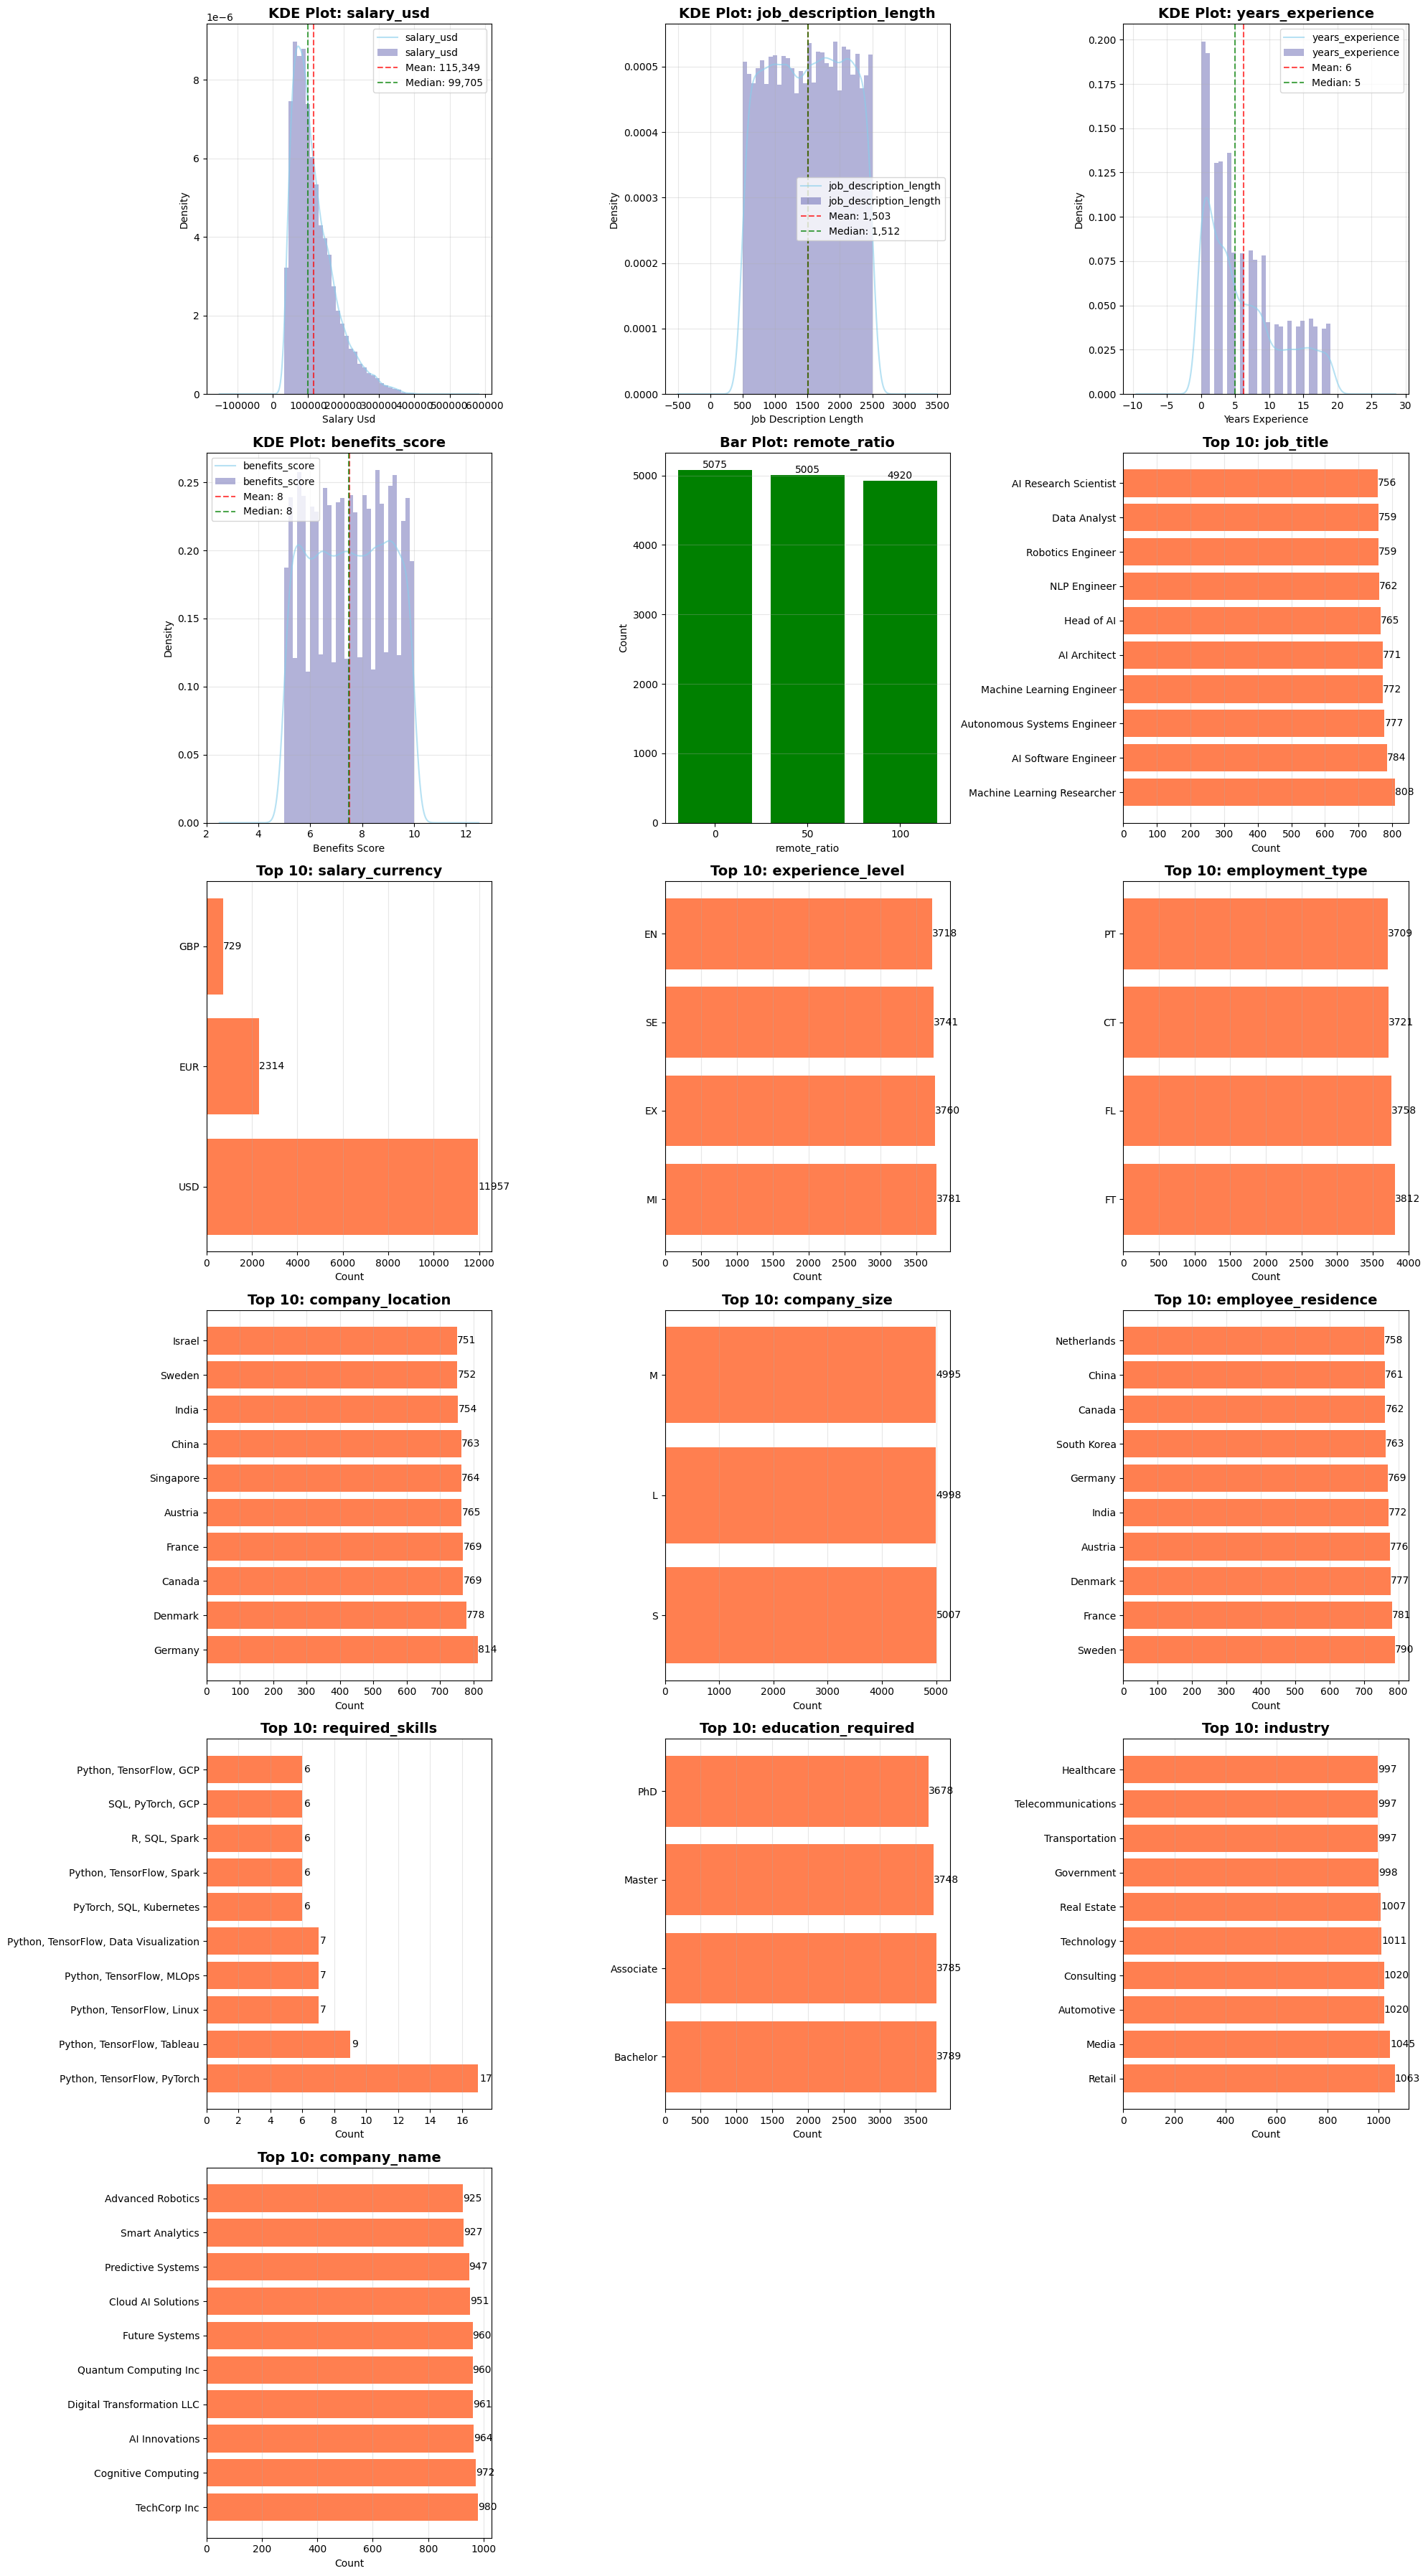

Tổng số biểu đồ: 16
- KDE plots (continuous): 4
- Bar plot (discrete): 1
- Horizontal bar plots (string): 11


In [11]:
# Định nghĩa các cột
str_columns = [col for col in df.select_dtypes(include=['object']).columns if col != 'job_id']
continuous_columns = ['salary_usd', 'job_description_length', 'years_experience', 'benefits_score']
discrete_column = ['remote_ratio']

# Tổng số biểu đồ cần vẽ
total_plots = len(continuous_columns) + len(discrete_column) + len(str_columns)

# Tính số dòng cần thiết (3 cột mỗi dòng)
n_rows = math.ceil(total_plots / 3)

# Tạo figure với subplot
fig, axes = plt.subplots(n_rows, 3, figsize=(20, 6*n_rows))
axes = axes.flatten()  # Chuyển thành mảng 1 chiều để dễ truy cập

# Đếm vị trí hiện tại
plot_idx = 0

# 1. Vẽ KDE plot cho các biến continuous
for col in continuous_columns:
    if plot_idx < len(axes):
        # KDE plot với fill
        df[col].plot.kde(ax=axes[plot_idx], color='skyblue', alpha=0.6)
        
        # Thêm histogram mờ phía sau để thấy distribution rõ hơn
        df[col].plot.hist(ax=axes[plot_idx], bins=30, alpha=0.3, color='navy', density=True)
        
        axes[plot_idx].set_title(f'KDE Plot: {col}', fontsize=14, fontweight='bold')
        axes[plot_idx].set_xlabel(col.replace('_', ' ').title())
        axes[plot_idx].set_ylabel('Density')
        axes[plot_idx].grid(True, alpha=0.3)
        
        # Thêm vertical line cho mean và median
        mean_val = df[col].mean()
        median_val = df[col].median()
        axes[plot_idx].axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:,.0f}')
        axes[plot_idx].axvline(median_val, color='green', linestyle='--', alpha=0.7, label=f'Median: {median_val:,.0f}')
        axes[plot_idx].legend()
        
        plot_idx += 1

# 2. Vẽ bar plot cho biến discrete (remote_ratio)
for col in discrete_column:
    if plot_idx < len(axes):
        # Đếm tần suất của từng giá trị
        value_counts = df[col].value_counts().sort_index()
        
        axes[plot_idx].bar(value_counts.index.astype(str), value_counts.values, color='green')
        axes[plot_idx].set_title(f'Bar Plot: {col}', fontsize=14, fontweight='bold')
        axes[plot_idx].set_xlabel(col)
        axes[plot_idx].set_ylabel('Count')
        axes[plot_idx].grid(True, alpha=0.3, axis='y')
        
        # Thêm giá trị trên mỗi cột
        for i, (idx, val) in enumerate(value_counts.items()):
            axes[plot_idx].text(i, val + 0.5, str(val), ha='center', va='bottom')
        
        plot_idx += 1

# 3. Vẽ horizontal bar plot cho các biến string
for col in str_columns:
    if plot_idx < len(axes):
        # Lấy top 10 giá trị phổ biến nhất
        top_values = df[col].value_counts().head(10)
        
        # Vẽ horizontal bar plot
        y_pos = range(len(top_values))
        axes[plot_idx].barh(y_pos, top_values.values, color='coral')
        axes[plot_idx].set_yticks(y_pos)
        axes[plot_idx].set_yticklabels(top_values.index, fontsize=10)
        axes[plot_idx].set_title(f'Top 10: {col}', fontsize=14, fontweight='bold')
        axes[plot_idx].set_xlabel('Count')
        axes[plot_idx].grid(True, alpha=0.3, axis='x')
        
        # Thêm giá trị trên các thanh
        for i, v in enumerate(top_values.values):
            axes[plot_idx].text(v + 0.1, i, str(v), va='center')
        
        plot_idx += 1

# Ẩn các subplot thừa
for idx in range(plot_idx, len(axes)):
    axes[idx].axis('off')

# Điều chỉnh layout
plt.tight_layout()
plt.show()

# In thông tin tổng quan
print(f"Tổng số biểu đồ: {total_plots}")
print(f"- KDE plots (continuous): {len(continuous_columns)}")
print(f"- Bar plot (discrete): {len(discrete_column)}")
print(f"- Horizontal bar plots (string): {len(str_columns)}")